In [1]:
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
import numpy as np

Quantum circuit with three qubits and three classical bits

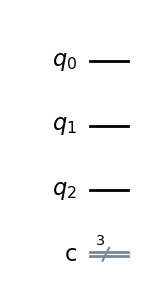

In [2]:
qc = QuantumCircuit(3, 3)
qc.draw('mpl')

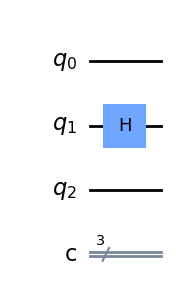

In [3]:
qc.h(1)
qc.draw('mpl')

A CSWAP gate (also known as the Controlled-SWAP gate or Fredkin gate) is used in quantum computing to perform a controlled-SWAP operation. Depending on the state of the control qubit, it swaps the states of the two target qubits.

In [4]:
qc.h(2)
qc.cswap(0, 1, 2)

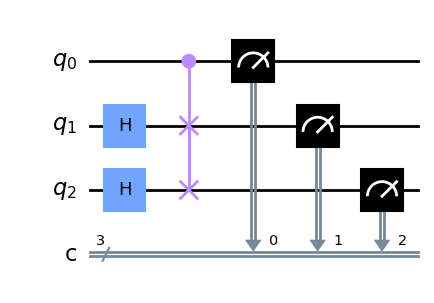

In [5]:
qc.measure(range(3), range(3))
qc.draw('mpl')

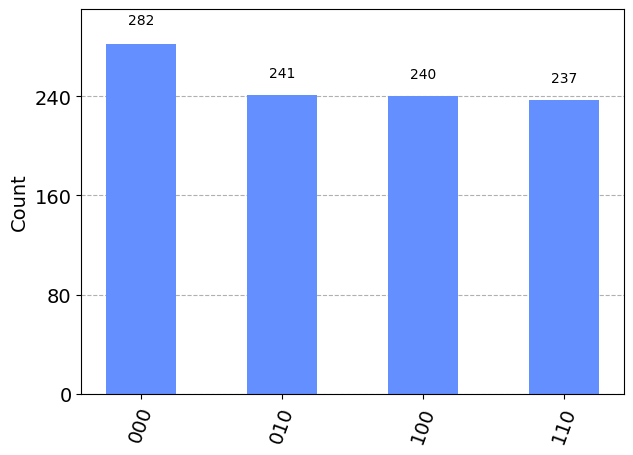

In [6]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots = 1000).result()
counts = result.get_counts()
plot_histogram(counts)

In [7]:
result = QuantumRegister(1, 'result') 
a      = QuantumRegister(2, 'a')
b      = QuantumRegister(2, 'b')
creg   = ClassicalRegister(1, 'creg')

In [8]:
swap_circ = QuantumCircuit()
swap_circ.add_register(result)
swap_circ.add_register(a)
swap_circ.add_register(b)
swap_circ.add_register(creg)

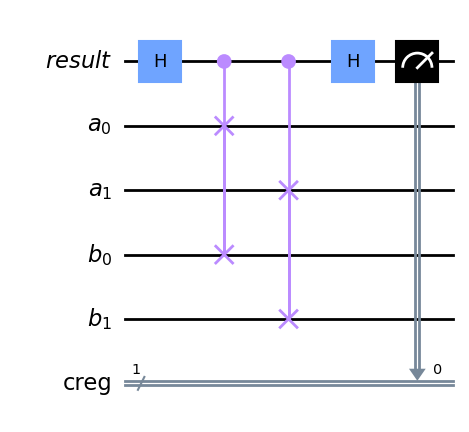

In [9]:
swap_circ.h(0)
n = len(a)
for i in range(n):
    swap_circ.cswap(0, i+1, i+n+1)
swap_circ.h(0)
swap_circ.measure(0, 0)
swap_circ.draw('mpl')

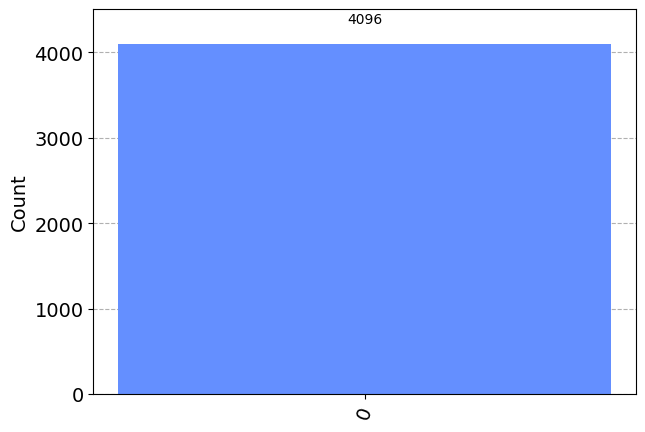

In [10]:
backend = Aer.get_backend('qasm_simulator')
st_counts = execute(swap_circ, backend, shots = 4096).result().get_counts()
plot_histogram(st_counts)

In [11]:
def swap_test(v1, v2, backend = 'qasm_simulator'):
    # Create registers
    result = QuantumRegister(1, 'result') 
    n      = int(np.log2(len(v1)))
    a      = QuantumRegister(n, 'a')
    b      = QuantumRegister(n, 'b')
    creg   = ClassicalRegister(1, 'creg')
    
    # Create quantum circuit
    swap_circ = QuantumCircuit()
    swap_circ.add_register(result)
    swap_circ.add_register(a)
    swap_circ.add_register(b)
    swap_circ.add_register(creg)
    
    # Initialize quantum registers
    swap_circ.initialize(v1, a)
    swap_circ.initialize(v2, b)
    
    # Apply quantum gates
    swap_circ.h(0)
    n = len(a)
    for i in range(n):
        swap_circ.cswap(0, i+1, i+n+1)
    swap_circ.h(0)
    swap_circ.measure(0, 0)
    
    st_counts = execute(swap_circ, backend, shots = 4096).result().get_counts()
    
    return st_counts

In [12]:
psi1 = [0, 1, 0, 0]
psi2 = [1/np.sqrt(2), 1/np.sqrt(2), 0, 0]
counts = swap_test(psi1, psi2, backend)
prob_0 = counts['0']/(counts['0'] + counts['1'])
inner_prod = np.sqrt(2*prob_0 - 1)
print(inner_prod)

0.7036456405748563


In [13]:
np.dot(psi1, psi2)

0.7071067811865475